In [ ]:
import numpy as np
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
import time

# from keras import metrics

In [ ]:
from keras.datasets import cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
required_classes = [1, 3, 5, 9]

In [ ]:
train_index = [i for i, label in enumerate(y_train) if label in required_classes]
test_index = [i for i, label in enumerate(y_test) if label in required_classes]
x_train = x_train[train_index]
y_train = y_train[train_index]
x_test = x_test[test_index]
y_test = y_test[test_index]

In [ ]:
y_train[(y_train == 1)] = 0   # automobile
y_train[(y_train == 3)] = 1   # cat
y_train[(y_train == 5)] = 2   # dog
y_train[(y_train == 9)] = 3   # truck

y_test[(y_test == 1)] = 0   # automobile
y_test[(y_test == 3)] = 1   # cat
y_test[(y_test == 5)] = 2   # dog
y_test[(y_test == 9)] = 3   # truck

In [ ]:
# one hot encode target values
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)


(20000, 32, 32, 3)
(4000, 32, 32, 3)


In [ ]:
x_train_filtered = x_train / 255.0
x_test_filtered = x_test / 255.0

In [ ]:
model= Sequential()
model.add(Conv2D(16,(3,3), activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation="relu"))

model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)          0

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
print(x_train_filtered.shape)
print(y_train.shape)
print(x_test_filtered.shape)
print(y_test.shape)

(20000, 32, 32, 3)
(20000, 4)
(4000, 32, 32, 3)
(4000, 4)


In [ ]:
start = time.time()

history = model.fit(x_train_filtered , y_train, epochs=50 , batch_size = 32, validation_data=(x_test_filtered, y_test))
model.save('cifar.h5')

end = time.time()
print("Run time [s]: ",end-start)

Epoch 1/50
625/625 [==============================] - 16s 5ms/step - loss: 0.9606 - accuracy: 0.5208 - val_loss: 0.8316 - val_accuracy: 0.6028
Epoch 2/50
625/625 [==============================] - 3s 5ms/step - loss: 0.8101 - accuracy: 0.6127 - val_loss: 0.7299 - val_accuracy: 0.6718
Epoch 3/50
625/625 [==============================] - 4s 6ms/step - loss: 0.7431 - accuracy: 0.6561 - val_loss: 0.7138 - val_accuracy: 0.6913
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 0.7026 - accuracy: 0.6790 - val_loss: 0.6601 - val_accuracy: 0.6985
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 0.6709 - accuracy: 0.6960 - val_loss: 0.6320 - val_accuracy: 0.7278
Epoch 6/50
625/625 [==============================] - 3s 5ms/step - loss: 0.6457 - accuracy: 0.7149 - val_loss: 0.5993 - val_accuracy: 0.7380
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 0.6225 - accuracy: 0.7246 - val_loss: 0.5967 - val_accuracy: 0.7318
Epoch

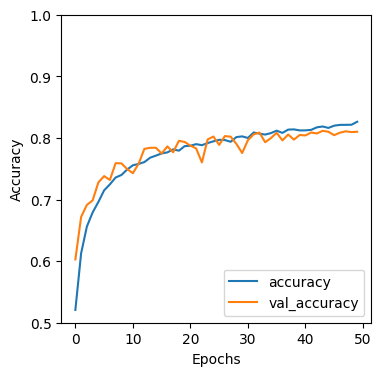

In [ ]:
plt.figure(figsize=(4,4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc = 'lower right');



In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 0s 2ms/step - loss: 87.7654 - accuracy: 0.5940


[87.76543426513672, 0.593999981880188]

**Batch_size = 64, activation Function= Relu**

In [ ]:
start = time.time()

history_relu_64 = model.fit(x_train_filtered , y_train, epochs=50 , batch_size = 64, validation_data=(x_test_filtered, y_test))
model.save('cifar.h5')

end = time.time()
print("Run time [s]: ",end-start)

Epoch 1/50
313/313 [==============================] - 13s 7ms/step - loss: 1.0386 - accuracy: 0.4915 - val_loss: 0.9043 - val_accuracy: 0.5715
Epoch 2/50
313/313 [==============================] - 2s 5ms/step - loss: 0.8417 - accuracy: 0.5994 - val_loss: 0.7834 - val_accuracy: 0.6457
Epoch 3/50
313/313 [==============================] - 2s 6ms/step - loss: 0.7979 - accuracy: 0.6252 - val_loss: 0.7360 - val_accuracy: 0.6625
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 0.7475 - accuracy: 0.6546 - val_loss: 0.7911 - val_accuracy: 0.6518
Epoch 5/50
313/313 [==============================] - 3s 8ms/step - loss: 0.7097 - accuracy: 0.6752 - val_loss: 0.6545 - val_accuracy: 0.7053
Epoch 6/50
313/313 [==============================] - 2s 6ms/step - loss: 0.6823 - accuracy: 0.6940 - val_loss: 0.6417 - val_accuracy: 0.7200
Epoch 7/50
313/313 [==============================] - 2s 6ms/step - loss: 0.6628 - accuracy: 0.7007 - val_loss: 0.6345 - val_accuracy: 0.7240
Epoch

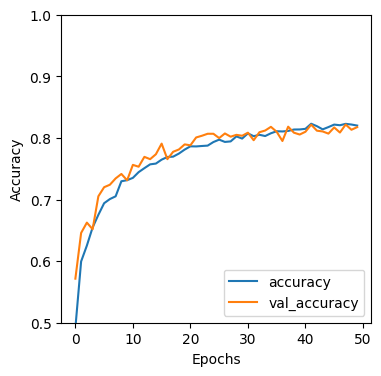

In [ ]:
plt.figure(figsize=(4,4))

plt.plot(history_relu_64.history['accuracy'], label='accuracy')
plt.plot(history_relu_64.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc = 'lower right');



In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 0s 2ms/step - loss: 57.6180 - accuracy: 0.6710


[57.61798095703125, 0.6710000038146973]

**Batch_size = 128, activation Function= Relu**

In [ ]:
start = time.time()

history_relu_128 = model.fit(x_train_filtered , y_train, epochs=50 , batch_size = 128, validation_data=(x_test_filtered, y_test))
model.save('cifar.h5')

end = time.time()
print("Run time [s]: ",end-start)

Epoch 1/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3826 - accuracy: 0.8383 - val_loss: 0.4297 - val_accuracy: 0.8200
Epoch 2/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3770 - accuracy: 0.8358 - val_loss: 0.4277 - val_accuracy: 0.8238
Epoch 3/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3784 - accuracy: 0.8378 - val_loss: 0.4334 - val_accuracy: 0.8255
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3743 - accuracy: 0.8404 - val_loss: 0.4412 - val_accuracy: 0.8165
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3772 - accuracy: 0.8388 - val_loss: 0.4205 - val_accuracy: 0.8290
Epoch 6/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3823 - accuracy: 0.8380 - val_loss: 0.4285 - val_accuracy: 0.8238
Epoch 7/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3738 - accuracy: 0.8408 - val_loss: 0.4467 - val_accuracy: 0.8173
Epoch 

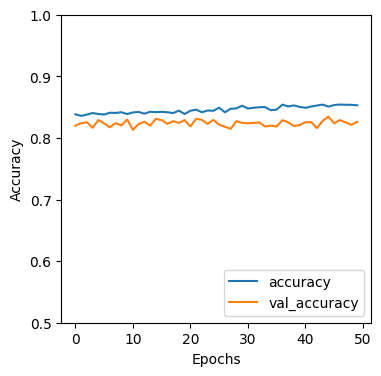

In [ ]:
plt.figure(figsize=(4,4))

plt.plot(history_relu_128.history['accuracy'], label='accuracy')
plt.plot(history_relu_128.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc = 'lower right');



In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 0s 3ms/step - loss: 77.9132 - accuracy: 0.6560


[77.91319274902344, 0.656000018119812]